# Heart Disease Prediction

## Summary

## Introduction
Heart disease is one of the leading causes of death worldwide, and early detection is key to improving treatment outcomes and patient survival rates. With growing availability of health data, machine learning has become an important tool in assisting with diagnosing and predicting diseases. A dataset that has been widely used is the Cleveland Heart Disease dataset, which contains medical records of patients, including various attributes related to their health conditions.

This analysis is focused on using the Hungarian dataset and its 13 attributes. The data was collected from 425 patients undergoing angiography at the Hungarian Institute of Cardiology in Budapest, Hungary (Detrano, et al., 1989, P.309). The target variable in the data set represents the presence or absence of heart disease, where 0 indicates a presence of the heart disease, and values 1,2,3, and 4 corresponding to varying degrees of heart disease. In particular, this analysis focuses on predicting patients with no heart disease and those with some form of heart disease, like most other experiments. 
For this project, the Hungarian data set was chosen due to its lowest disease prevalence of 38% (Detrano, et al., 1989, P.309). Furthermore, the names and social security numbers of patients have been replaced with anonymized values to maintain privacy. 

### Main question of the analysis are: 
1. What is the overall accuracy of a classification model for heart disease prediction?
2. What features are most predictive of the presence of heart disease?
3. How does the model handle unbalanced data?

The following sections of this report will outline the methods used to analyze the data, the results of the analysis, and the discussions on the findings. 


## Methods & Results

### EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../data/processed/processed_heart_disease_data.csv')

In [5]:
# In this section we will look at some of the features in detail
# Summary statistics for numerical features
print('\nSummary Statistics:')
print(data.describe())


Summary Statistics:
              age         sex  resting_blood_pressure  cholesterol  \
count  297.000000  297.000000              297.000000   297.000000   
mean    54.542088    0.676768              131.693603   247.350168   
std      9.049736    0.468500               17.762806    51.997583   
min     29.000000    0.000000               94.000000   126.000000   
25%     48.000000    0.000000              120.000000   211.000000   
50%     56.000000    1.000000              130.000000   243.000000   
75%     61.000000    1.000000              140.000000   276.000000   
max     77.000000    1.000000              200.000000   564.000000   

       fasting_blood_sugar  max_heart_rate  st_depression  num_of_vessels  \
count           297.000000      297.000000     297.000000      297.000000   
mean              0.144781      149.599327       1.055556        0.676768   
std               0.352474       22.941562       1.166123        0.938965   
min               0.000000       71.0000

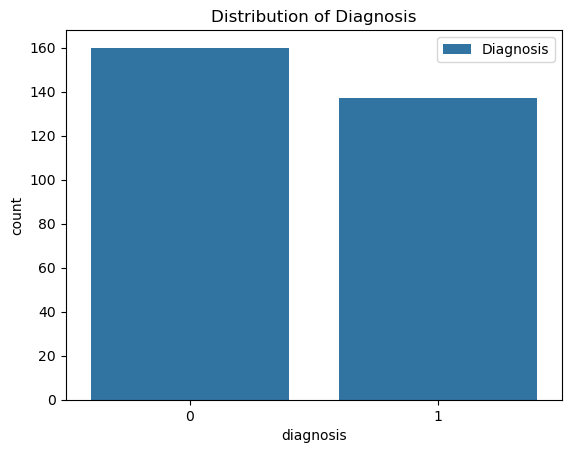

In [6]:
# Visualizing the distribution of the target variable
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.legend(['Diagnosis'], loc='upper right')
plt.show()

In [7]:
numeric_data = data.select_dtypes(include=['number'])

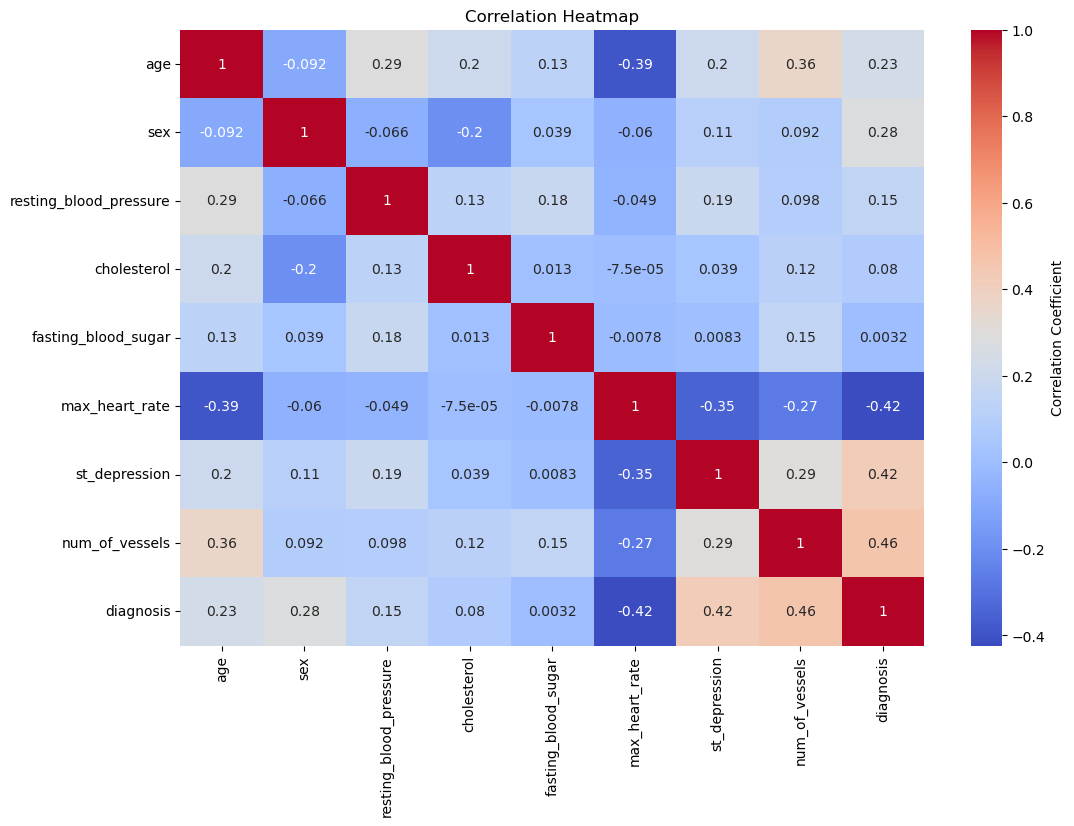

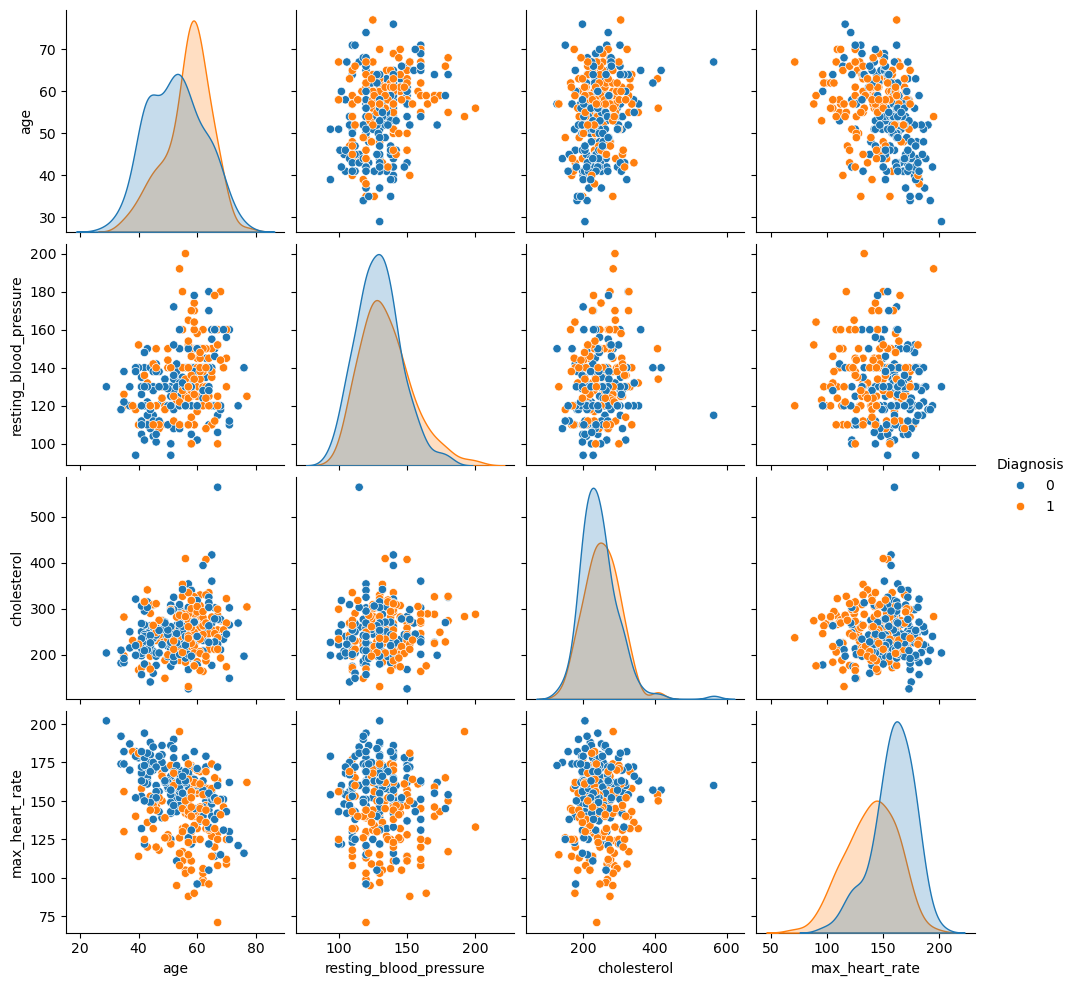

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap')
plt.show()
# Pair plot to observe relationships between selected features
pairplot = sns.pairplot(
    data[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'diagnosis']],
    hue='diagnosis'
)
pairplot._legend.set_bbox_to_anchor((1, 0.5))
pairplot._legend.set_title('Diagnosis')
plt.show()

### EDA Results

To better understand the dataset and assess the relationships between the features and the target variable (diagnosis), we created several visualizations. These plots help us identify patterns, correlations, and potential challenges in the data that could impact our modelling process.
We observe that the target is somewhat imbalanced, with the majority of patients in Class 0 (likely no disease or mild cases), while Classes 1, 2, and 3 have moderate representation, and Class 4 is rare. This suggests most patients are healthy or have mild conditions, which reflects real-world distributions but could make it challenging to identify more severe cases during modellling.
To assess whether each feature might be useful in predicting the severity of heart disease, we examined the distributions and relationships of the continuous predictors (age, trestbps, chol, thalach, and oldpeak) across diagnosis classes. The bar plot of diagnosis distribution showed a significant class imbalance, with most patients classified as Diagnosis = 0 (no heart disease) and far fewer cases in the higher diagnosis classes. From the correlation heatmap, we found that oldpeak, ca, thal, and thalach showed the strongest correlations with Diagnosis, suggesting these features are likely to be the most informative. Pairwise plots further highlighted trends, such as lower thalach values and higher oldpeak values being associated with more severe diagnoses, while features like chol and fbs showed little separation between classes. Overall, features like oldpeak and thalach appear to be the most relevant, while weaker features like chol may contribute less directly to the model.

### Import

## Discussion

In [9]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [10]:
df = pd.read_csv("../data/processed/processed_heart_disease_data.csv")

df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope,num_of_vessels,thalassemia,diagnosis
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,no,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160,286,0,left ventricular hypertrophy,108,yes,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120,229,0,left ventricular hypertrophy,129,yes,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal pain,130,250,0,normal,187,no,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,no,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,asymptomatic,140,241,0,normal,123,yes,0.2,flat,0.0,reversable defect,1
293,45,1,typical angina,110,264,0,normal,132,no,1.2,flat,0.0,reversable defect,1
294,68,1,asymptomatic,144,193,1,normal,141,no,3.4,flat,2.0,reversable defect,1
295,57,1,asymptomatic,130,131,0,normal,115,yes,1.2,flat,1.0,reversable defect,1


In [11]:
numeric_features = [
    "age", 
    "resting_blood_pressure", 
    "fasting_blood_sugar", 
    "cholesterol", 
    "max_heart_rate", 
    "st_depression", 
    "sex"
]
categorical_features = [
    "chest_pain_type", 
    "rest_ecg", 
    "exercise_induced_angina", 
    "slope", 
    "num_of_vessels", 
    "thalassemia"
]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="if_binary", handle_unknown="ignore")

# Column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features)
)

preprocessor


ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'resting_blood_pressure',
                                  'fasting_blood_sugar', 'cholesterol',
                                  'max_heart_rate', 'st_depression', 'sex']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['chest_pain_type', 'rest_ecg',
                                  'exercise_induced_angina', 'slope',
                                  'num_of_vessels', 'thalassemia'])])

In [12]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
preprocessor.verbose_feature_names_out = False

X_train_enc = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())

X_train_enc

,age,resting_blood_pressure,fasting_blood_sugar,cholesterol,max_heart_rate,st_depression,sex,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,slope_downsloping,slope_flat,slope_upsloping,num_of_vessels_0.0,num_of_vessels_1.0,num_of_vessels_2.0,num_of_vessels_3.0,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,1.429458,1.519207,-0.403635,0.707663,-1.724876,0.375999,0.661438,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.383259,-0.642139,-0.403635,0.874948,0.565533,-0.901327,0.661438,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.754406,0.870803,-0.403635,-0.835080,0.523118,-0.901327,0.661438,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.766985,1.303073,-0.403635,-0.054415,-0.240352,-0.901327,0.661438,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.529389,1.735342,2.477485,-1.336935,-2.488345,-0.049777,0.661438,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1.204441,0.978871,-0.403635,-0.426160,-1.470386,-0.049777,-1.511858,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
203,1.204441,1.519207,-0.403635,2.083119,0.098968,-0.220087,-1.511858,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
204,-0.145663,0.330467,-0.403635,-0.258875,0.480703,-0.901327,-1.511858,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
205,-0.033155,0.168366,2.477485,1.042233,0.904853,-0.901327,-1.511858,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
X_train_enc.columns

Index(['age', 'resting_blood_pressure', 'fasting_blood_sugar', 'cholesterol',
       'max_heart_rate', 'st_depression', 'sex',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'num_of_vessels_0.0', 'num_of_vessels_1.0',
       'num_of_vessels_2.0', 'num_of_vessels_3.0', 'thalassemia_fixed defect',
       'thalassemia_normal', 'thalassemia_reversable defect'],
      dtype='object')

In [15]:
scoring = {
    "accuracy": 'accuracy',
    'precision': make_scorer(precision_score, pos_label=True),
    'recall': make_scorer(recall_score, pos_label=True),
    'f1': make_scorer(f1_score, pos_label=True),

}  

In [16]:
cross_val_results = {}

logreg = make_pipeline(preprocessor, LogisticRegression(random_state = 123, max_iter = 1000))

cross_val_results['logreg'] = pd.DataFrame(cross_validate(logreg, X_train, y_train, scoring = scoring, return_train_score = True)).agg(['mean', 'std']).round(3).T

cross_val_results['logreg'] 

/Users/brianchang/miniforge-pypy3/envs/heart_disease/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.014,0.003
score_time,0.022,0.014
test_accuracy,0.841,0.068
train_accuracy,0.890,0.011
test_precision,0.850,0.092
train_precision,0.912,0.015
test_recall,0.820,0.057
train_recall,0.855,0.029
test_f1,0.834,0.068
train_f1,0.882,0.014


/Users/brianchang/miniforge-pypy3/envs/heart_disease/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


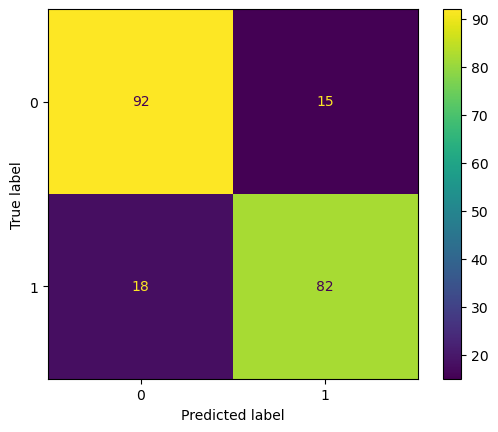

In [17]:
confmat_logreg = ConfusionMatrixDisplay.from_predictions(
    y_train,  # true class labels
    cross_val_predict(logreg, X_train, y_train),  # predicted class labels
)

In [18]:
logreg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'fasting_blood_sugar',
                                                   'cholesterol',
                                                   'max_heart_rate',
                                                   'st_depression', 'sex']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['chest_pain_type',
                                                   'rest_ecg',
                                                   'exercise_induced_angina',
                                                   'slope', 'num_of_vessels',
                                                   'thalassemia'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=123))])

In [19]:
logreg_model = logreg.named_steps['logisticregression']

In [20]:
feature_names = logreg.named_steps['columntransformer'].get_feature_names_out()

print("Intercept:", logreg_model.intercept_)

coefficients = pd.DataFrame(logreg_model.coef_.ravel(), index=feature_names, columns=['Coefficient'])

coefficients.sort_values(by='Coefficient', inplace=True, ascending=False)

Intercept: [0.14890597]


In [21]:
coefficients = pd.DataFrame({
    "Feature": feature_names,  
    "Coefficient": logreg_model.coef_.ravel()
})

coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

coefficients.style.background_gradient(cmap="coolwarm", subset=["Coefficient"]).set_caption("Logistic Regression Coefficients")

,Feature,Coefficient
7,chest_pain_type_asymptomatic,1.242617
20,num_of_vessels_2.0,0.936761
24,thalassemia_reversable defect,0.908607
16,slope_flat,0.789179
6,sex,0.467793
1,resting_blood_pressure,0.464303
21,num_of_vessels_3.0,0.416970
5,st_depression,0.400422
12,rest_ecg_left ventricular hypertrophy,0.268959
14,exercise_induced_angina_yes,0.210783


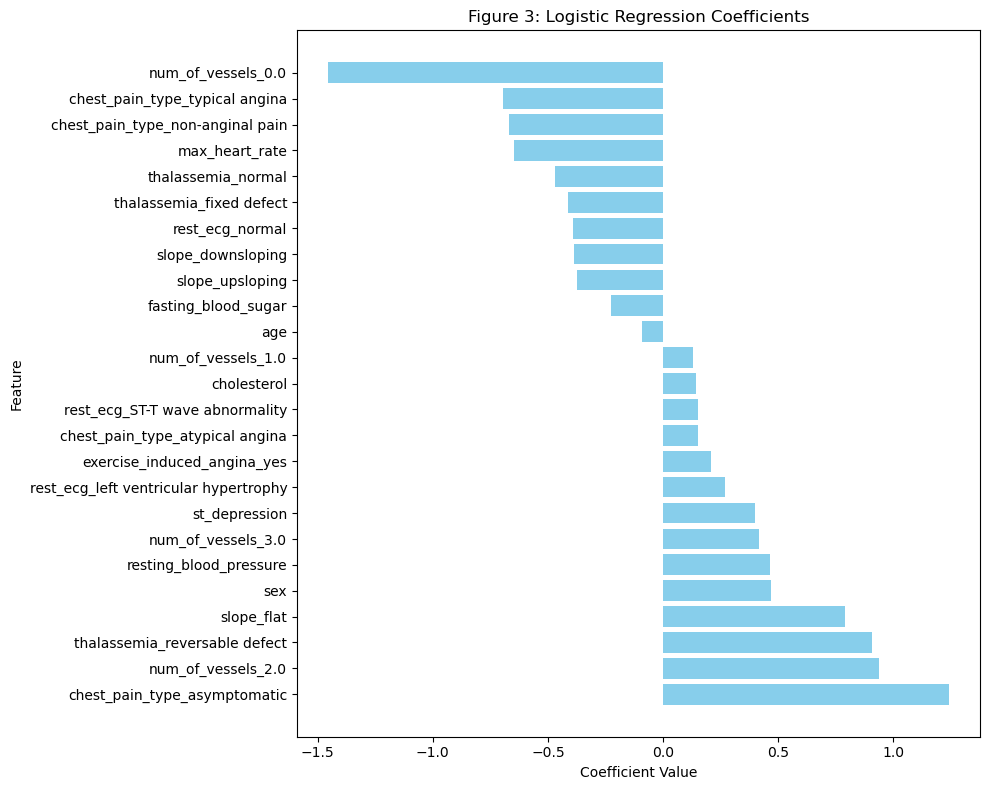

In [22]:
plt.figure(figsize=(10, 8))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color='skyblue')
plt.title("Figure 3: Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [23]:
pred = logreg.predict(X_test)

In [24]:
confusion_matrix(y_test,pred)

array([[45,  8],
       [ 8, 29]])

In [25]:
loges_report = classification_report(y_test, pred, output_dict=True)

loges_report_df = pd.DataFrame(loges_report).transpose()

loges_report_filtered = loges_report_df.loc[['0', '1', 'accuracy'], ['precision', 'recall', 'f1-score']]

loges_report_filtered

,precision,recall,f1-score
0,0.849057,0.849057,0.849057
1,0.783784,0.783784,0.783784
accuracy,0.822222,0.822222,0.822222


In [26]:
decision_tree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state = 123))

decision_tree.fit(X_train, y_train)

decision_tree_result = decision_tree.predict(X_test)

In [27]:
confusion_matrix(y_test,decision_tree_result)

array([[37, 16],
       [ 6, 31]])

In [28]:
decision_tree_report = classification_report(y_test, decision_tree_result, output_dict=True)

decision_tree_report_df = pd.DataFrame(decision_tree_report).transpose()

decision_tree_report_filtered = decision_tree_report_df.loc[['0', '1', 'accuracy'], ['precision', 'recall', 'f1-score']]

decision_tree_report_filtered

,precision,recall,f1-score
0,0.860465,0.698113,0.770833
1,0.659574,0.837838,0.738095
accuracy,0.755556,0.755556,0.755556


## References